## Previously (Was for Milestone 2)

As discussed in the first Milestone, we expected data cleaning, including text processing, handling missing values etc. as a major task of the Milestone. We considered that about 60-80% of our task (in the golbal Milestone) will be this. Without any surprise, we remark this expectation to be true. Indeed, database is dirty, really dirty... Although a lot of preprocess seemed to have been already done from the `rawText` of the `emails` database, we remark the latter to have been really poor. For example, in order to construct the Hillary's Network we need the exact `receiver` and `sender` of any emails. We remark some obvious mistakes in the Aliases correspondance with the personId for example. We explain deeper below the major difficulty that we have encountered and how we have finally handled them.

As said above, this Milestone focuses essentially on data cleaning and preprocess of rawText. Moreover, according to the questions and tasks we expect to provide, we have to clean and process data for the following features:

1. 'To' and 'From' (who receives and sends emails)

2. 'Date' (precise date of emails sending)

3. Extract content of emails (as good as possible) before preprocessing and cleaning

These three steps are crucial.

## Plan (Milestone 2)

1. Data Description 

    1.1. how are `aliases` and `personId` related? how clean are they ? 

    1.2. how clean are `MetaDataTo` ('To') and `MetaDataFrom` ('From')? are there missing values? 
    
    1.3. what is the behaviour of the content of `rawText`? (is it messy, multi-emails, etc)
        
2. Data Cleaning and Processing

    2.1. Clean the `aliases` and `personId` relation
    
    2.2. Construction clean `To` and `From` features by processing and NaN filling
    
    2.3. Text cleaning for `rawText` (remove inappropriate lines)
    
    2.4. Text processing (lowcase, remove stopwords, remove short sentences, stemmatization, etc)
    
    2.5. Features engineering 
           
        2.5.0. Emails time distribution

        2.5.1. Map emails to countries/regions
        
        2.5.2. Word-frequency
        
        2.5.3. Research of thematics
        
3. Pre-results

    3.1. Adjacency matrix (Hillary's network) construction
    
    .....
        
3. Milestone 3, to be done: graph visu, map visu, 

# Official public work with private tools

The controversy of Hillary Clinton's email hit the headlines in 2015. The goal of this project is to get a precise view of her network based on the emails publicly available on [Kaggle](https://www.kaggle.com/kaggle/hillary-clinton-emails).

# Milestone 3

As explained in the previous Milestones, the most important and time costly task is the data cleaning part. Indeed, provided dataset are essentially text and therefore a lot of typos, etc appear. In order to perform a great analysis, we have to clean the data as well as possible. Our datasets are given by three mains dataframes:

- Emails
- Persons
- Aliases

The last one, EmailsReceivers is redundant (same information lies in emails dataframe).

The above dataframes essentially catch the following informations, that will be important in our work.


### Persons

Provide a unique (should) person Id for any email receiver or sender. It has two columns, the Name of a sender/receiver and the corresponding ID.

### Aliases

Each person may have numerous aliases (Hillary Clinton, H, Hillary, etc). Aliases dataframe makes the correspondance between possible aliases and real person ID. It has three columns, aliases Id (unique), aliases Name and corresponding personsId.

### Emails

....

#### Main Objectives

In this work, we have decided to mainly focus on the following things:

- The Hillary's Network

- The timeline of emails exchange

- The main topics/thematics in emails

- The main topics/thematics per region, country

In order to get fairly good results and interpretation, we need as said before to clean the different datasets. We present therefore the main steps according to this study willing.

The following plan is the one provided for the report. In the notebook, to ease the comprehension, we include data cleaning and text processing part directly within the data exploratory. Evenmore, the different results are provided along the all notebooks and not only at the end as in the report.

Indeed, in data analysis it is very common to work as in a circle way and not in a linear way (data exploratory --> data cleaning --> again data exploratory and so on).

## Plan

1. Data Exploratory
    
    1.1. How clean `aliases` and `personId` are ? How are they related ? 
   
    1.2. how clean are `MetaDataTo` ('To') and `MetaDataFrom` ('From') in `emails`? are there missing values? 
    
    1.3. How are `aliases` and `personId` related in `emails` (`MetaDataTo` ('To') and `MetaDataFrom` ('From')) ?
    
    1.4. What is the behaviour of the content of `rawText`? (is it messy, multi-emails, etc)
        
2. Data Cleaning and Processing (algorithms explaination)

    2.1. Clean the `aliases` and `personId` relation
    
    2.2. Clean `To` and `From` features by processing and NaN filling
    
    2.3. Text cleaning for `rawText` (remove inappropriate lines)
    
    2.4. Text processing (lowcase, remove stopwords, remove short sentences, stemmatization, etc)
    
        
3. Results
    
    3.1. Hillary's network
           
    3.2. Emails time distribution

    3.3. Map emails to countries/regions
        
    3.4. WordCloud
        
    3.5. Research of thematics
    



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk, re, string ,collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from datetime import datetime, date, time
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

from extractor import Extractor
from process import Process
from analyse import Analyse
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

C:\Users\Brice\Anaconda3\envs\myenvironment\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
data_folder = "data/"

The data is available in two formats: csv and sql. This means that the elements are somehow related. We will see later that the entity relationship diagram is not as it should have been done.

In [3]:
#Data extraction from the csv-files
emails_raw = pd.read_csv(data_folder + 'Emails.csv')
persons = pd.read_csv(data_folder + 'Persons.csv')
aliases = pd.read_csv(data_folder + 'Aliases.csv')
email_receivers = pd.read_csv(data_folder + 'EmailReceivers.csv')

In [4]:
print("emails:", emails_raw.shape)
print("persons:", persons.shape)
print("aliases:", aliases.shape)
print("email receivers:", email_receivers.shape)

emails: (7945, 22)
persons: (513, 2)
aliases: (850, 3)
email receivers: (9306, 3)


# Data exploratory

## How clean `aliases` and `personId` are ? How are they related ?

### Aliases

In [5]:
aliases.shape

(850, 3)

In [6]:
aliases.head()

,Id,Alias,PersonId
0,1,111th congress,1
1,2,agna usemb kabul afghanistan,2
2,3,ap,3
3,4,asuncion,4
4,5,alec,5


In [7]:
aliases.PersonId.is_unique

False

In [8]:
aliases.Alias.is_unique

True

In [9]:
aliases.groupby('PersonId').count().shape

(513, 2)

In [13]:
aliases.sort_values(by='PersonId').head()

,Id,Alias,PersonId
0,1,111th congress,1
1,2,agna usemb kabul afghanistan,2
2,3,ap,3
3,4,asuncion,4
4,5,alec,5


In [14]:
aliases[aliases['PersonId']==10]

,Id,Alias,PersonId
10,11,slaughter annmarie,10
11,12,slaughter anne marie,10
12,13,slaughter annemarie,10
13,14,slaughtera@state.gov,10
441,442,annemarie slaughter,10


In [15]:
aliases[aliases['Id'].isin([849,850])]

,Id,Alias,PersonId
848,849,hanle mr@state.gov,512
849,850,ha nleym r@state.gov,513


Aliases seems to merge same persons with different Alias to a unique PersonId. This merge reduces dimensionality from 850 to 513. However, as the above subset show, PersonId seems to mismatch some evident similar persons. We investigate then into PersonId dataset.

### Persons

In [16]:
persons.shape

(513, 2)

In [17]:
persons.head()

,Id,Name
0,1,111th Congress
1,2,AGNA USEMB Kabul Afghanistan
2,3,AP
3,4,ASUNCION
4,5,Alec


In [18]:
persons.Id.is_unique

True

In [19]:
persons.groupby('Name').count().shape

(513, 1)

In [20]:
persons.sort_values('Name').tail(20)

,Id,Name
311,312,valmorol1@state.gov.
293,294,valmorolj@state.gov.
380,381,valmoroll@state.gov
269,270,valmoroll@state.gov.
418,419,valmorou state. ov
271,272,valmorou@state.gov
304,305,valmorou@state.gov.
343,344,valmorou@state.gove
439,440,valmorou@state.goy
315,316,valmorou©state.gov


In [317]:
persons.head(220)

,Id,Name,newId
0,1,111th Congress,1
1,2,AGNA USEMB Kabul Afghanistan,2
2,3,AP,3
3,4,ASUNCION,4
4,5,Alec,5
5,6,Alex Dupuy,6
6,7,American Beverage Association,7
7,8,Andrew Mayock,8
8,9,Andrew Shapiro,9
9,10,Anne-Marie Slaughter,10


### Preliminary results

There are some evident mistakes in terms of unique persons ID. Some obviously same persons are considered to be different. The reason is essentially due to spelling mistakes. Since it is quite difficult to create a clear function to make match the similar persons, and since the dataset is quite small, we decide to manually match the most evident same persons. 

Moreover, it is quite easy to remark that the first \~220 Names are unique and are the main persons (with capital). We will therefore match the rest 300 with those names if it is evident.

In [22]:
persons.sort_values('Name').Name.tolist()

['.',
 '. huma abedin',
 '. vermarr@state.gov',
 '..lilotylc@state.gov.',
 '.1ilotylc@state.gov',
 '.1ilotylc@state.gov.',
 '.filotylc@state.gov.',
 '.gordonph@state.gov.',
 '111th Congress',
 'AGNA USEMB Kabul Afghanistan',
 'AP',
 'ASUNCION',
 'Alec',
 'Alex Dupuy',
 'American Beverage Association',
 'Andrew Mayock',
 'Andrew Shapiro',
 'Anne-Marie Slaughter',
 'Anthony Lake',
 'Arturo Valenzuela',
 'Ban Ki-moon',
 'Barack Obama',
 'Barbara Mikulski',
 'Betsy Ebeling',
 'Bill Clinton',
 'Biography',
 'Bonnie Klehr',
 'Brian Greenspun',
 'Burns Strider',
 'Capricia Marshall',
 'Carlos Pascual',
 'Caroline Adler',
 'Case Button',
 'Cecile Richards',
 'Chad Weston',
 'Charles Kiamie',
 'Chelsea Clinton',
 'Cherie Blair',
 'Cheryl',
 'Cheryl Mills',
 'Chester Crocker',
 'Christopher Butzgy',
 'Christopher Edwards',
 'Christopher Green',
 'Christopher Hill',
 'Claire Coleman',
 'Colin Powell',
 'Council on Foreign Relations',
 'Courtney Beale',
 'Craig Kelly',
 'Daily Sun',
 'Dana Hyde',


### Remarks and Issues

`Aliases` is not to be unique per Aliases while `persons` is. Multiple obviously same Aliases point on different person. We have to handle this in order to have an efficient database.

## Data cleaning Part

### Clean the `aliases` and `personId` relation

Here we create a new personId by fetching the persons that are obviously the same in order to handle the previous remarks/issues.

In [23]:
# We create manually the dictionary that will fetch same Person in a unique ID
dictionary_merge_name = {
    'Hillary Clinton':['Hill','h b6', 'h i'],
    
    'Lauren Jiloty':['jilotylc©state.gov','jilotylc@state.gov.','filotylc@state.gov','illotylc@state.gov','.1ilotylc@state.gov',
                     '.filotylc@state.gov.','laurenjiloty jilotylc@state.gov','laurenjiloty','filotylc@state.gov.','..lilotylc@state.gov.',
                     'iilotylc@state.gov', 'jilot lc@state. ov', '.1ilotylc@state.gov.', 'iilotylc@state.gov.', 'jilotylc©state.gov.', 'jilotylc@state.goy'],
    
    'Monica Hanley':['monica.hanle','hanieymr@state.gov', 'hanle mr@state.gov', 'hanleymr@state.gov.', 'hanleymr@stategov', 'hanleymrgastategov',
                     'hanleyrnr@state.gov', 'ha nleym r@state.gov'],
    
    'Philippe Reines':['reines philippe f', 'reines philippe t', 'reinesp@state.goy', 'reiriesp@state.gov','preines verveerms@state.gov',
                        'preines@','preines b6', 'preines h', 'preines huma abedin', 'prein6', 'preine', 'preine h', 'preine5', 'p rei n es'],
    
    'Cheryl Mills':['Cheryl','rnillscd@state.gov', 'rnillscd@state.gov.', 'rnillscd@state.govs', 'rnillscd@stategov.', 'williamsbarrett millscd@state.gov.',
                    'miliscd@stategov', 'millscd@state ov', 'millscd@state. ov', 'millscd@state.00v.', 'millscd@state.aov', 'millscd@state.gov.', 'millscd@state.goy',
                    'millscd@state.ov', 'millscd@tate.gov', 'millscd©state.gov', 'cmills', 'cdm', 'cheryimills millscd@state.gov', 'cheryl.miils@ millscd@state.gov',
                    'cheryl.mill', 'cheryl.mill abedin huma', 'cheryl.mill sullivanjj@state.gov', 'cheryl.mill1', 'cheryl.millf.', 'cheryl.mills _',
                    'cheryl.mills abedinh@state.gov', 'cheryl.mills huma abedin', 'cheryl.mills jake.sullivan', 'cheryl.mills millscd@state.gov', 'cheryl.mills millscd@state.gov.',
                    'cheryl.mills sullivanjj@state.gov', 'cheryl.mills sullivanjj@state.gov b6', 'cheryl.mills( sullivanjj@state.gov', 'cheryl.mills@ millscd@state.gov.',
                    'cheryl.millsi', 'chetyl.mills sullivanij@state.gov'],
    
    'Rosemarie Howe':['rosemarie howe', 'rosemarie.howe h'],
    
    'Robert Russo':['russoiv@state.gov', 'russorv@stategov'],
    
    'Huma Abedin':['. huma abedin','capriciamarshall huma abedin', 'eabedinh@state.gov', 's abedinh@state.gov', 'huma abed in', 'huma abedin b6',
                   'hume abed in', 'hume abedin', 'habedin', 'habedin b6', 'habedin(', 'a bed in h@state.gov', 'a bed inh@state.gov', 'a bedinh@state.gov',
                   'abdinh@state.gov', 'abed inh@state.gov.', 'abedinh  state ov', 'abedinh@state.gov.', 'abedinh@state.gove', 'abedinh@state.govr',
                   'abedinh@state.goy', 'abedinh@stategov', 'abedinh@stategovl', 'abedinh©state.gov'],
    
    
    'sbwhoeo':['sbwhoeop b6', 'sbwhoeopi'],
    'Todd Stern':['todd stern'],
    'torres susan':['tones susan'],
    
    'williamsbarret':['williamsbarre0'],
    
    
    
    'Strobe Talbott': ['sta i bott', 'sta ibott'],
    
    
    'Lona Valmoro': ['lona valmoro', 'vaimorou@state.gov', 'val moro u@state.gov', 'valmdrou@state.gov', 'valmoro lona .1', 'valmorol.1@state.gov',
                     'valmorol1@state.gov', 'valmorol1@state.gov.', 'valmorolj@state.gov.', 'valmoroll@state.gov', 'valmoroll@state.gov.', 'valmorou state. ov',
                     'valmorou@state.gov', 'valmorou@state.gov.', 'valmorou@state.gove', 'valmorou@state.goy', 'valmorou©state.gov', 'valmorou©state.gov.'],
    
    'Jake Sullivan': ['jacob j sullivan','jake.sullivar','jake.sulliva','jake.sullivan h','jake.sullivar preines', 'jake.sulliyan',
                      'preines  sullivanjj@state.gov', 'preines sullivanij@state.gov.', 'preines sullivanjj@state.gov', 'preines sullivanjj@state.gov b6',
                      's sullivanjj@state.gov', 'ullivanjj@state.gov','su ii iva gll@state.gov.', 'suilivanii@stategov', 'suilivanij@state.gok',
                      'sulliva njj@state.g ov', 'sullivahu@state.gov', 'sullivan jacob j nuland victoria 1', 'sullivanii@state.gov', 'sullivanii@state.gov.',
                      'sullivanii@state.govr', 'sullivanij@state.gov', 'sullivanij@state.gov.', 'sullivanij@state.gove', 'sullivanj@state.gov',
                      'sullivanji@state.gov', 'sullivanjj@siate.gov', 'sullivanjj@state.golt', 'sullivanjj@state.gov b6', 'sullivanjj@state.gov.',
                      'sullivanjj@state.govr', 'sullivanjj@state.goy', 'sullivanjj©state ov', 'sullivanu@state.gov.', 'sulliyanfostate.gott',
                      'sulliyanij@state.goy', 'sulliyanjj@state.goy','jai:e sullivan'],
    
    'James Steinberg': ['steinberg james', 'steinberg1b@state.gov', 'steinberg1b@state.gov.', 'steinbergib@state.gov']
    
}

In [24]:
swap_keys_person = {}
for k,v in dictionary_merge_name.items():
    for val in v:
        swap_keys_person[val] = k

def change_personId(swap_keys_person, x):
    try:
        name=swap_keys_person[x]
        personId = persons[persons.Name==name].Id.values[0]
        return personId
    except:
        personId = persons[persons.Name==x].Id.values[0]
        return personId

In [25]:
persons['newId']=persons.Name.apply(lambda x: change_personId(swap_keys_person, x))

In [27]:
# Persons that got a newId
persons[persons.Id != persons.newId]

,Id,Name,newId
30,31,Cheryl,32
78,79,Hill,80
229,230,reines philippe f,170
230,231,sullivan jacob j nuland victoria 1,87
231,232,russorv@stategov,185
233,234,su ii iva gll@state.gov.,87
234,235,sullivahu@state.gov,87
235,236,russoiv@state.gov,185
236,237,miliscd@stategov,32
237,238,abedinh@stategov,81


In [28]:
print(persons.Id.nunique())
print(persons.newId.nunique())

513
340


### Results

Thanks to our strategy of cleaning person Id data, we could improve the dataset of personId by reducing the set from 513 to 340 persons. Reduction of around 30%.


## Data exploration in `emails` 


In [30]:
emails_raw.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [31]:
emails_raw.dtypes

Id                                int64
DocNumber                        object
MetadataSubject                  object
MetadataTo                       object
MetadataFrom                     object
SenderPersonId                  float64
MetadataDateSent                 object
MetadataDateReleased             object
MetadataPdfLink                  object
MetadataCaseNumber               object
MetadataDocumentClass            object
ExtractedSubject                 object
ExtractedTo                      object
ExtractedFrom                    object
ExtractedCc                      object
ExtractedDateSent                object
ExtractedCaseNumber              object
ExtractedDocNumber               object
ExtractedDateReleased            object
ExtractedReleaseInPartOrFull     object
ExtractedBodyText                object
RawText                          object
dtype: object

Unfortunately, we will have to perform some actions to get the identities of the 'from', 'to' and 'cc'. Actually, we have the value of the 'to' from the table `emails_receiver` and it points towards the `PersonId` field. However, the fields 'from' and 'cc' point towards the `aliases` (not even its identifiers!).

In [32]:
emails_raw.MetadataCaseNumber.unique()

array(['F-2015-04841', 'F-2014-20439', 'F-2014-020439', 'F-2013-20439',
       'O-2014-20439'], dtype=object)

In [33]:
emails_raw.MetadataDocumentClass.unique()

array(['HRC_Email_296', 'HRCEmail_JuneWeb', 'HRCEmail_JulyWeb',
       'Clinton_Email_August_Release'], dtype=object)

In [34]:
emails_raw.ExtractedReleaseInPartOrFull.unique()

array(['RELEASE IN FULL', 'RELEASE IN PART', 'UNKNOWN'], dtype=object)

The meaning of these fields are obscure and we assume there are not relevant for our case.

It is time to cast what we can.

In [35]:
emails_raw.MetadataDateSent = emails_raw.MetadataDateSent.map(pd.to_datetime)
emails_raw.MetadataDateReleased = emails_raw.MetadataDateReleased.map(pd.to_datetime)
emails_raw.ExtractedDateReleased = emails_raw.ExtractedDateReleased.map(pd.to_datetime)

## Restructuring the tables

The structure of the database does not respect the basic principles of well design database (foreign key, decoupling, many elements in a single cell...). We can see it if we draw the entity relationship diagram.

    ----------        /\       -----------
    | Emails |-------<  >------| Aliases |
    ----------        \/       -----------
         |             |            |
         |             |            |
         |             |            |
         /\       -----------       /\
        <  >------| Persons |------<  >
         \/       -----------       \/

The links between the tables should not be redundant because this leads to possible inconsistent states and errors. We need to decouple what we have.

    ----------       /\        -----------       /\       -----------
    | Emails |------<  >------ | Persons |------<  >------| Aliases |
    ----------       \/        -----------       \/       -----------

### Choose relevant fields

Fortunately, `ExtractedDataSent` is redundant because it is contained in `MetadataDateSent` when it is not `null`. So we can simply drop it. This is great because it saves us from a lot of monkey work.

While testing manually random values, we conclude we will have to redo what was supposed to be done with most of the extracted values.

In [36]:
# We only keep the fields which appear in the itemization above
emails = emails_raw[['Id', 'MetadataSubject', 'SenderPersonId', 'MetadataTo', 'MetadataDateSent', 'MetadataDateReleased', 'RawText']]

emails.head()

,Id,MetadataSubject,SenderPersonId,MetadataTo,MetadataDateSent,MetadataDateReleased,RawText
0,1,WOW,87.0,H,2012-09-12 04:00:00,2015-05-22 04:00:00,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,NaN,H,2011-03-03 05:00:00,2015-05-22 04:00:00,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,CHRIS STEVENS,32.0,;H,2012-09-12 04:00:00,2015-05-22 04:00:00,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,CAIRO CONDEMNATION - FINAL,32.0,H,2012-09-12 04:00:00,2015-05-22 04:00:00,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,80.0,"Abedin, Huma",2011-03-11 05:00:00,2015-05-22 04:00:00,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


## How clean are `MetaDataTo` ('To') and `SenderPersonId` ('From')? 

- Are there missing values?

- Process NaN values

In [37]:
# SenderPersonId
def fetch_from_alias(alias_raw, content_raw):
    if alias_raw is not None:
        alias_found = Process.alias(alias_raw)
        person_id = aliases[aliases.Alias.str.strip() == alias_found].PersonId.values
        if len(person_id) == 1:
            return person_id[0]
    return np.nan

def fetch_from_pid(personId, content_raw):
    if not np.isnan(personId):
        return personId
    alias_extracted = Extractor.sender_alias(content_raw)
    return fetch_from_alias(alias_extracted, content_raw)

emails['from_init'] = emails.apply(lambda row: fetch_from_pid(row['SenderPersonId'], row['RawText']), axis=1)
nb_nan = emails.SenderPersonId.isna().sum()
nb_from_recover = nb_nan - emails['from_init'].isna().sum()

emails.drop('SenderPersonId', axis=1, inplace=True)

print("We manage to recover %d out of %d NaN for the sender_id." % (nb_from_recover, nb_nan))

We manage to recover 11 out of 157 NaN for the sender_id.


### How many NaN can we manage ?

In [38]:
# MetadataTo
counter_not_nan = 0
counter_recover = 0
emails['to_init'] = np.nan

for i in range(emails.shape[0]):
    if not isinstance(emails.MetadataTo[i], str):
        continue
    counter_not_nan += 1
    alias = Process.alias(str(emails.MetadataTo[i]))
    person_id = aliases[aliases.Alias.str.strip() == alias].PersonId.values
    if len(person_id) == 1:
        emails.iat[i, -1] = person_id[0]
        counter_recover += 1
    else:
        print(emails.MetadataTo[i]) # could not match a person

emails.drop('MetadataTo', axis=1, inplace=True)
print('***')
print("We manage to compute %d out of %d for the receiver_id." % (counter_recover, counter_not_nan))

michele.flournoy
Axelrod_D
Terry.Duffy
glantz.
rosemarie.howe ;H
cheryl.mills ;H
rrh.interiors
mh.interiors
H;preines
H;preines
Abedin, Huma; H
Abedin, Huma; H
Ki-moon, Ban
Sullivan, Jake; H
Etats-Unis D'Amerique
Etat-Unis D'Amerique
Duk-soo, Han
Duk-soo, Han
Betsy.Ebeling
***
We manage to compute 7671 out of 7690 for the receiver_id.


The `MetadataTo` field contains many `NaN`s and some elements (list above) could match a person. Hope is not lost because we can extract this value from the `RawText` field.

## Proceed similarly for MetadataTo

In [39]:
def fetch_alias(to, content_raw):
    if not np.isnan(to):
        return to
    else:
        alias_extracted = Extractor.destination_alias(content_raw)
        return fetch_from_alias(alias_extracted, content_raw)

emails['to_init'] = emails.apply(lambda row: fetch_alias(row['to_init'], row['RawText']), axis=1)
nb_nan = emails.to_init.isna().sum()
nb_from_recover = nb_nan - emails.to_init.isna().sum()

print("We manage to recover %d out of %d NaN for the receiver." % (nb_from_recover, nb_nan))

We manage to recover 0 out of 244 NaN for the receiver.


It looks like the one who preprocessed the database before us followed the same procedure.

There is one more thing we can do: we use the table `email_receivers`. As said earlier, it does not make any difference between the one who received the email directly or the one who received it through the 'cc' option.

Our first guess is that the first row containing a given email is always the receiver and the others, if any, are the cc. Let's check it this assumption holds.

In [40]:
nb_tot = 0
nb_correct = 0
for i in range(emails.shape[0]):
    if not np.isnan(emails.to_init[i]):
        pids = email_receivers[email_receivers.EmailId == emails.Id[i]].PersonId.values
        if len(pids) > 1:
            nb_tot += 1
            if pids[0] == emails.to_init[i]:
                nb_correct += 1

print("%d / %d." % (nb_correct, nb_tot))

795 / 1244.


There are 1244 emails for which we have the destination AND for which there are at least 2 rows in `email_receivers`. Among these 1244, the first row is the destination in 795 times. This number is not huge but it is not small either. Assuming this ratio always holds, it is better to adopt this strategy than choosing randomly.

## Find receiver as Cc

In [41]:
def fetch_pid_through_email_receiver(eid, previous_to):
    if np.isnan(previous_to):
        pids = email_receivers[email_receivers.EmailId == eid].PersonId.values
        if len(pids) >= 1:
            return pids[0]
    return previous_to

nb_nan_before = emails.to_init.isna().sum()
emails['to_init'] = emails.apply(lambda row: fetch_pid_through_email_receiver(row['Id'], row['to_init']), axis=1)
nb_nan_after = emails.to_init.isna().sum()
recover = nb_nan_before - nb_nan_after
print("%d out of %d NaN." % (recover, nb_nan_before))

15 out of 244 NaN.


Using the stategy we have described earlier, we feed 15 more rows with a value for the field `to`.

Now that we are done with the 'from' and 'to', we can work on the 'cc'. We use the table `email_receivers` and drop the row whose `EmailId` and `PersonId` combination appears in the table `emails`.

In [42]:
table_cc = pd.merge(emails, email_receivers, left_on='Id', right_on='EmailId')
table_cc = table_cc[table_cc.to_init != table_cc.PersonId][['EmailId', 'PersonId']]

In [43]:
print(len(table_cc))
print(len(email_receivers))

1539
9306


In [314]:
table_cc.head()

,EmailId,PersonId
2,3,228
18,17,32
19,17,229
20,17,170
21,17,87


## Clean `To` and `From` features

In [44]:
persons_id_to_map = {}
personsId = persons.Id.tolist()
clean_personsId=persons.newId.tolist()
map_personsId={m:clean_personsId[i] for i,m in enumerate(personsId)}

In [45]:
emails['to']= emails['to_init'].map(map_personsId)
emails['from']= emails['from_init'].map(map_personsId)

In [46]:
print((emails['to'] != emails['to_init']).sum())
print((emails['from'] != emails['from_init']).sum())

233
146


In [47]:
emails.drop(['from_init', 'to_init'], axis=1, inplace=True)

In [49]:
emails.head()

,Id,MetadataSubject,MetadataDateSent,MetadataDateReleased,RawText,to,from
0,1,WOW,2012-09-12 04:00:00,2015-05-22 04:00:00,UNCLASSIFIED\nU.S. Department of State\nCase N...,80.0,87.0
1,2,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,2011-03-03 05:00:00,2015-05-22 04:00:00,UNCLASSIFIED\nU.S. Department of State\nCase N...,80.0,194.0
2,3,CHRIS STEVENS,2012-09-12 04:00:00,2015-05-22 04:00:00,UNCLASSIFIED\nU.S. Department of State\nCase N...,80.0,32.0
3,4,CAIRO CONDEMNATION - FINAL,2012-09-12 04:00:00,2015-05-22 04:00:00,UNCLASSIFIED\nU.S. Department of State\nCase N...,80.0,32.0
4,5,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,2011-03-11 05:00:00,2015-05-22 04:00:00,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,81.0,80.0


### Results

We improve the data quality thanks to those data cleaning strategy in about 10% of the total emails.

## Behaviour of the content of `rawText` ? (is it messy, multi-emails, etc)
    
We remark that the rawText are not clean at all. It is quite difficult to catch the real content of the email, to now if a supposed email is one or an exchange of emails, etc. 

Assuming there is a pattern. It is not easy to find it. That's why we will use some basic rules we describe later.

To ease the tasks of the Milestone we first assume that one rawText is one exchange, but that all the content is used at the same time in the analysis (we do not split exchange of emails, email per email). Secondly, we need to process the data to get the core of the content. We proceed as follows:

## Text cleaning and preprocessing

It is time to clean the (raw) content. Since the database we have contains less than 10,000 emails, we need to preprocess the data in an effective way. We need to remove common words and common sentences which appear almost on each email. This is necessary when running marchine learning algorithm on it to get better results.

This could have been enough but the database is really poor. So we need to perform more actions... We will limit ourselves to:

1. Remove lines which start by a frequent sequences (e.g. "Case No...", "U.S. Department of State", ...)
2. Replace upper case by lower case
3. Remove the emails
4. Tokenization based on sentence (".", "!", "?", ...)
5. Remove punctionations and numbers.
6. Remove stop words (the one provided  by nltk)
7. [Stemming and Lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) (reducing words, "car" and "cars" should not be considered as different entity for example)
8. Ignore sentence if it contains less than 4 words. We may loose some useful information but it filters out a huge amount of dirty words which resist the previous steps.
9. Join the sentence to build the new content.

Ideally, we would like to use lemmatization. But this would be a project in the project and it would take too much time to complete and stemming produces reasonable output.

We will see that it is still not enough!

10. Remove stop word we compute based on tf-idf from the step

### Text processing is provided in Process.py 

In [ ]:
# You can test the function here
lemmatize = True
sentences = "I like flowers. This was useless, I write completely stupid stuff because I suck for these exercises"
print(Process.content(sentences, not lemmatize))
print("***")
print(Process.content(sentences, lemmatize))

In [ ]:
# This may take a while...
emails['content'] = emails.RawText.map(lambda txt: Process.content(txt, False))

In [ ]:
# testing results manually
idx = 200
print(emails.content[idx])
print('***')
print(emails.RawText[idx])

In [ ]:
# now we can drop the raw content
emails = emails.drop('RawText', axis=1)

### Graphs, Results and Visualization tools

The goal of this part is to provide the main graphs, results via vizualisation tools. We will first present an algorithm that permit to map as good as possible emails with countries, regions, persons, etc. Secondly we provide some basic tools in order to get a better understand about the subjects discussed, time distribution, etc. Then we provide some ideas in order to find some reccurent thematics. Finally we present the Hillary's Network.


### Map emails to countries/regions

We would like to classify the email into (not excluding) categories like Middle East, Europe... But we do not have this information. We need to create it somehow. In order to build the data, we will use a system based on keywords. The dictionary on which is based our region mapping is not an exhaustive one.

In [ ]:
emails['africa'] = emails.content.map(lambda content: Extractor.earth_area(content, "africa"))
emails['central_asia'] = emails.content.map(lambda content: Extractor.earth_area(content, "central_asia"))
emails['europe'] = emails.content.map(lambda content: Extractor.earth_area(content, "europe"))
emails['far_east'] = emails.content.map(lambda content: Extractor.earth_area(content, "far_east"))
emails['middle_east'] = emails.content.map(lambda content: Extractor.earth_area(content, "middle_east"))
emails['latino'] = emails.content.map(lambda content: Extractor.earth_area(content, "latino"))
emails['north_america'] = emails.content.map(lambda content: Extractor.earth_area(content, "north_america"))
emails['russia'] = emails.content.map(lambda content: Extractor.earth_area(content, "russia"))

In [ ]:
emails.head()

## Content is still messy

We need to remove a lot of words. And we cannot do it manually. A good idea is to use `Counter` to remove common words among documents.

In [ ]:
vectorizer = TfidfVectorizer()
corpus = []
for doc in emails.content:
    corpus.append(str(doc).replace("|", " "))
vectorizer.fit_transform(corpus)
idf = vectorizer._tfidf.idf_
word_score = dict(zip(vectorizer.get_feature_names(), idf))

In [ ]:
for key in word_score.keys():
    if key.startswith("afg"):
        print(key)

This is not surprising that there are many spell mistakes. Of course, we are not able to correct everything.

In [ ]:
def stop_word_based_on_emails(threshold=3.4):
    d = set()
    for (key, value) in word_score.items():
        if value < threshold:
            d.add(key)
    return d

stop_word = stop_word_based_on_emails()

# we add manually entries
stop_word.add('u')

print(stop_word)

We remove these words from the content because they appear frequently.

In [ ]:
def content_without_stop_word(content):
    ret = []
    for sentence in str(content).split('|'):
        acc = []
        for word in sentence.split():
            if word not in stop_word:
                acc.append(word)
        if len(acc) >= 1:
            ret.append(" ".join(acc))
    return "|".join(ret)

emails.content = emails.content.map(content_without_stop_word)

In [ ]:
emails.content[166]

## Save our transformed data

In [ ]:
PATH_TO_GENERATED = '../generated/'

In [ ]:
# Saving
emails.to_csv(PATH_TO_GENERATED + 'emails.csv', encoding='utf-8', index=False)
table_cc.to_csv(PATH_TO_GENERATED + 'table_cc.csv', encoding='utf-8', index=False)
persons.to_csv(PATH_TO_GENERATED + 'persons.csv', encoding='utf-8', index=False)
aliases.to_csv(PATH_TO_GENERATED + 'aliases.csv', encoding='utf-8', index=False)

In [ ]:
# Fetching
emails = pd.read_csv(PATH_TO_GENERATED + 'emails.csv')
persons = pd.read_csv(PATH_TO_GENERATED + 'persons.csv')
aliases = pd.read_csv(PATH_TO_GENERATED + 'aliases.csv')
emails.MetadataDateSent = emails.MetadataDateSent.map(pd.to_datetime)
emails.MetadataDateReleased = emails.MetadataDateReleased.map(pd.to_datetime)

## Word 2 vector

Now that the content is cleaned, we need to represent it a vectorized way. We can use the word2vec alogorithm on the emails to "see" the proximity of some words.

We will not reinvent the wheel. So we use the package `gensim` and compute the vectors based on sentences (and not documents).


We train our model with the following parameters: dimension: 20, window: 4, min_count: 2. The `dimension` is the dimension of vectors. The window is a sliding rectangle containing 4 words. The `min_count` is the minimum number of times the word needs to be in the corpus to be taken into account. Finally we set `epochs` to 300.

Please, run the following command if you want to play with your input.

    > python3 main.py set_word2vec

In [ ]:
model = Word2Vec.load('model_word2vec.bin')

In [ ]:
model.wv.most_similar(positive="wikileak", topn=20)

Word2Vec is effective when we have a corpus like wikipedia. This means we cannot really use it here since we have a small number of documents... Therefore we need to use something else.

# Visualization

It is time to see what we have. We will discover the data by

1. Observing the **dates** and making assumptions we hope to verify.
2. Clustering documents by region using an unsupervised algorithm to determine the "number of topics".
3. Creating a word cloud for each region.

## Visualization of `emails` time distribution

In [ ]:
from datetime import datetime

In [ ]:
emails_occurrences = emails.MetadataDateSent.dropna() \
    .map(lambda dt: date(dt.year, dt.month, dt.day)) \
    .value_counts() \
    .sort_index()

In [ ]:
nb_nan = emails.shape[0] - emails.MetadataDateSent.dropna().shape[0]
print("There are %d emails which are not taken into account" % (nb_nan))

In [ ]:
def plot_emails_frequencies(freq):
    plt.figure(figsize=(15,8))
    plt.plot(freq)
    plt.xticks(rotation=70)
    plt.title("Occurrences of Hillary's emails", size=18)
    plt.ylabel("Number of emails", size=13)
    plt.show()

plot_emails_frequencies(emails_occurrences)

We see three interesting moments:

* from 2009 to 2011
* from 2011 to 2012 June (it looks like some emails have not been or could not be disclosed)
* from 2012 June to 2013

We introduce some external knowledge:

    2009.03.17: France joins (again) NATO.
    2009.04   : Swine flu
    2010.04.10: Polish president dies in plane crash in Russia
    2010.04.20: BP oil split
    2010.05.10: The Greek crisis
    2010.05.11: David Cameron becomes prime minister
    2010.05.31: Gaza flotilla raid
    2010.07   : Wikeleaks and Julian Assange
    2011.01.01: Dilma Roussef becomes president of Brazil
    2011.01.14: Ben Ali leaves Tunisia to Saudi Arabia
    2011.01.25: Revolution starts in Egypt
    2011.02.11: Hosni Moubarak resigns
    2011.02.17: Mouammar Kadhafi's problems start
    2011.03.11: Fukishima catastroph
    2011.02.15: It starts in Syria
    2011.07.22: Anders Behring Breivik in Norway
    2011.08   : Southern Israel cross-border attacks
    2011.10.20: Mouammar Kadhafi is killed

    2012.04   : Election in France
    2012.09.11: Christopher Stevens, US ambassador in Libya is killed
    2012.11.06: Barack Obama is elected

    2013.03.15: Hugo Chavez is dead

### Research of thematics

It is time to show what words reveal.

In [ ]:
emails_africa = emails[emails['africa']]
emails_central_asia = emails[emails['central_asia']]
emails_europe = emails[emails['europe']]
emails_far_east = emails[emails['far_east']]
emails_middle_east = emails[emails['middle_east']]
emails_latino = emails[emails['latino']]
emails_north_america = emails[emails['north_america']]
emails_russia = emails[emails['russia']]

In [ ]:
def plot_distribution_email(start=None, end=None):
    labels = ('Africa', 'Central Asia', 'Europe', 'Far East', 'Middle East', 'North Amercia', 'Latino', 'Russia')
    y_pos = np.arange(len(labels))
    if start is None or end is None:
        title = 'Distribution of the emails'
        mail_count = [emails_africa.shape[0], emails_central_asia.shape[0], emails_europe.shape[0],
                      emails_far_east.shape[0], emails_middle_east.shape[0], emails_north_america.shape[0],
                      emails_latino.shape[0], emails_russia.shape[0]]
    else:
        title = 'Distribution of the emails from %d-%d-%d to %d-%d-%d' % (start[0], start[1], start[2], end[0], end[1], end[2])
        
        tmp_africa = emails_africa.dropna(subset=['MetadataDateSent'])
        tmp_africa = tmp_africa[(tmp_africa.MetadataDateSent >= datetime(start[0], start[1], start[2])) &\
                               (tmp_africa.MetadataDateSent <= datetime(end[0], end[1], end[2]))].shape[0]
        tmp_central_asia = emails_central_asia.dropna(subset=['MetadataDateSent'])
        tmp_central_asia = tmp_central_asia[(tmp_central_asia.MetadataDateSent >= datetime(start[0], start[1], start[2])) &\
                               (tmp_central_asia.MetadataDateSent <= datetime(end[0], end[1], end[2]))].shape[0]
        tmp_europe = emails_europe.dropna(subset=['MetadataDateSent'])
        tmp_europe = tmp_europe[(tmp_europe.MetadataDateSent >= datetime(start[0], start[1], start[2])) &\
                               (tmp_europe.MetadataDateSent <= datetime(end[0], end[1], end[2]))].shape[0]
        tmp_far_east = emails_far_east.dropna(subset=['MetadataDateSent'])
        tmp_far_east = tmp_far_east[(tmp_far_east.MetadataDateSent >= datetime(start[0], start[1], start[2])) &\
                               (tmp_far_east.MetadataDateSent <= datetime(end[0], end[1], end[2]))].shape[0]
        tmp_middle_east = emails_middle_east.dropna(subset=['MetadataDateSent'])
        tmp_middle_east = tmp_middle_east[(tmp_middle_east.MetadataDateSent >= datetime(start[0], start[1], start[2])) &\
                               (tmp_middle_east.MetadataDateSent <= datetime(end[0], end[1], end[2]))].shape[0]
        tmp_north_america = emails_north_america.dropna(subset=['MetadataDateSent'])
        tmp_north_america = tmp_north_america[(tmp_north_america.MetadataDateSent >= datetime(start[0], start[1], start[2])) &\
                               (tmp_north_america.MetadataDateSent <= datetime(end[0], end[1], end[2]))].shape[0]
        tmp_latino = emails_latino.dropna(subset=['MetadataDateSent'])
        tmp_latino = tmp_latino[(tmp_latino.MetadataDateSent >= datetime(start[0], start[1], start[2])) &\
                               (tmp_latino.MetadataDateSent <= datetime(end[0], end[1], end[2]))].shape[0]
        tmp_russia = emails_russia.dropna(subset=['MetadataDateSent'])
        tmp_russia = tmp_russia[(tmp_russia.MetadataDateSent >= datetime(start[0], start[1], start[2])) &\
                               (tmp_russia.MetadataDateSent <= datetime(end[0], end[1], end[2]))].shape[0]
        
        mail_count = [tmp_africa, tmp_central_asia, tmp_europe,
                      tmp_far_east, tmp_middle_east, tmp_north_america,
                      tmp_latino, tmp_russia]
    plt.figure(figsize=(15,3))
    plt.barh(y_pos, mail_count, align='center', alpha=1)
    plt.yticks(y_pos, labels)
    plt.xlabel('Number of emails')
    plt.title(title)

    plt.show()

In [ ]:
plot_distribution_email()

Some care is necessary before interpreting this plot. It is not a surprse that North America outnumbered the other places. Since the content of the emails are based from the american point of view, keyword extraction will consider more emails related to North America than we should.

In [ ]:
def word_bar_plot(words, title, xlabel):
    '''Plot the horizontal bar chart for each region'''
    plt.figure(figsize=(15,7))
    plt.barh(range(len(words)),[val[1] for val in words], align='center')
    plt.yticks(range(len(words)), [val[0] for val in words])
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

In [ ]:
def get_top_words(corpus, words=None, n=30, tf_idf=True, plot=True):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    corpus = corpus.dropna()
    xlabel = 'Count words'
    
    if words is not None:
        corpus = corpus[corpus.str.contains(words)]

    if tf_idf:
        vec = TfidfVectorizer(ngram_range=(2,2)).fit(corpus)
        xlabel = 'Tf-Idf scores'
    else:
        vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    if plot:
        word_bar_plot(words_freq[:n], words, xlabel)
    return words_freq[:n]

In [ ]:
w = get_top_words(emails_africa.content, None)


In [ ]:
w = get_top_words(emails_central_asia.content, None)


In [ ]:
w = get_top_words(emails_europe.content, None)

In [ ]:
w = get_top_words(emails_middle_east.content, None)


In [ ]:
w = get_top_words(emails_far_east.content, None)


In [ ]:
w = get_top_words(emails_latino.content, None)

In [ ]:
w = get_top_words(emails_north_america.content, None)

In [ ]:
w = get_top_words(emails_russia.content, None)

Based on the horizontal plot for each region, we guess the main subjects are: (comment are done according to 1-gram and 2-grams)

* **Africa:** Human rights, Libya, policy transition, islam, revolution of 2011.
* **Central Asia:** Human rights, Al Qaida, Ben Laden. Pakistant, Saudia Arabia.
* **Europe:** Climat change, European Union, UK, human rights.
* **Far East:** Petrol, climat change, human rights. Related to specific countries as North Korea, South Korea, Saudi Arabia
* **Middle east:** Human rights, peace, missil defense. Related to Israel, Palestinia.
* **North America:** Health care, human rights are some subjects.
* **Latino:** Contains only around 250 emails for subjects completely different. Difficult to conclude anything.
* **Russia:** Missil defense, human rights, north korean, arm control are some interesting suubject related to Russia.

It is interesting to remark that the only subject that is shared everywhere is the Human Rights.

### Evolution of the distribution

We have seen that there are three moments which can be identified when looking at the plot of the number of emails per day. Let's have a look at:

(Note the scale are different)

In [ ]:
plot_distribution_email([2009, 1, 1], [2011, 1, 1])

In [ ]:
plot_distribution_email([2011, 1, 1], [2012, 6, 1])

The above plot covers the Arab revolution in 2011 + NATO operation in Libya.

In [ ]:
plot_distribution_email([2012, 6, 1], [2013, 1, 1])

As we have said, the US ambassador for Libya was killed in September 2012. This is probably the reason why we have so many emails one year after Kaddafi.

## Visualization of the classes

If we compare the dataset we have with what we are used to have, then we can say our dataset is really small. However, it is still impossible for a human to read and group documents together. It is obvious we need an unsupervised algorithm. We hope the cosine distance between document will reveal the number of classes per region and complete with external knowledge to name them.

The dendogram code is taken from [here](http://brandonrose.org/clustering) on November 24th 2018.

In [ ]:
# Dendogram
def plot_dendogram(region):
    emails_filtered = emails[emails.content.map(lambda content: Extractor.earth_area(str(content), region))].content
    tfidf_matrix = Analyse.tfidf_matrix(emails_filtered)
    dist = 1 - cosine_similarity(tfidf_matrix)
    linkage_matrix = ward(dist)
    
    fig, ax = plt.subplots(figsize=(15, 20)) # set size
    ax = dendrogram(linkage_matrix, orientation="right")

    plt.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)

    plt.tight_layout() #show plot with tight layout

In [ ]:
plot_dendogram('africa')

Africa is dominated by 3 classes even if we only see two colors.

In [ ]:
plot_dendogram('middle_east')

The middle east is divided into 3 classes.

In [ ]:
plot_dendogram('europe')

This diagram suggests Europe is not dominated by one or two topics in particular. We can explain that by the fact that Europe is interfering with many countries and organizations (EU, Libya, NATO, Iran, ...)

In [ ]:
plot_dendogram('central_asia')

In [ ]:
plot_dendogram('far_east')

The purple and the red are likely to be China and Korea.

In [ ]:
plot_dendogram('russia')

In [ ]:
plot_dendogram('latino')

## Word-Cloud


In [ ]:
from wordcloud import WordCloud

In [ ]:
import wordcloud
print(wordcloud._version)

In [ ]:
def wordcloud_visualization(contents):
    wordcloud = WordCloud(background_color="white").generate(str(contents))
    fig, ax = plt.subplots(figsize=(15, 20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
wordcloud_visualization(emails_africa.content)

In [ ]:
wordcloud_visualization(emails_middle_east.content)

In [ ]:
wordcloud_visualization(emails_europe.content)

In [ ]:
wordcloud_visualization(emails_central_asia.content)

In [ ]:
wordcloud_visualization(emails_far_east.content)

In [ ]:
wordcloud_visualization(emails_russia.content)

In [ ]:
wordcloud_visualization(emails_latino.content)

## Hillary's Network

In this part, we provide the Hillary's Network. In order to get interpretable results and graphs, we focus on the most important exchangers of her Network. Moreover, to ease the computation of the Network, we decide not taking in account the sender or receiver direction.

### Step by step

- Remove NaN values
- Remove self-loop if exists
- Reorder to-from by sorted values
- Count emails exchange per pair of to-from (weights of the adjacency matrix)
- Create the adjacency matrix
- Plot Network

In [59]:
to_from = emails[['to', 'from']].copy()
to_from.shape

(7945, 2)

### Remove NaN and self-loop

In [60]:
to_from = to_from[(to_from['to'] >= 0)&(to_from['from'] >= 0) & (to_from['from']!=to_from['to'])].reset_index(drop=True)
to_from.shape

(7655, 2)

### Reorder by sorted values

In [62]:
to_from = pd.DataFrame(np.sort(to_from.values, axis=1), to_from.index, to_from.columns)


### Count emails per pair

In [290]:
pre_adjacency = to_from.groupby(['to','from']).size().reset_index().rename(columns={0:'weights'})

In [291]:
pre_adjacency = pre_adjacency[pre_adjacency.weights > 15].reset_index(drop=True)

### Create Adjacency

In [292]:
all_id = np.unique(pre_adjacency['to'].tolist()+pre_adjacency['from'].tolist())
map_id = {k:i for i,k in enumerate(sorted(all_id))}
pre_adjacency['to']=pre_adjacency['to'].map(map_id)
pre_adjacency['from']=pre_adjacency['from'].map(map_id)

In [293]:
shape = int(pre_adjacency['from'].max())
weighted_matrix = np.zeros((shape+1,shape+1))
j=0
for i in range(shape+1):
    for j in range(shape+1):
        try:
            weighted_matrix[i,j]=pre_adjacency[(pre_adjacency['to']==i)&(pre_adjacency['from']==j)].weights.values[0]
            weighted_matrix[j,i]=pre_adjacency[(pre_adjacency['to']==i)&(pre_adjacency['from']==j)].weights.values[0]
        except:
            print('Does not exist')

Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not e

Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not exist
Does not e

In [294]:
# Matrix is symmetric
(weighted_matrix.T-weighted_matrix).sum()

# Normalized by weights_sum
normalized_weighted_matrix = (weighted_matrix/pre_adjacency.weights.sum())

In [295]:
# Import for graph visualization
import networkx as nx

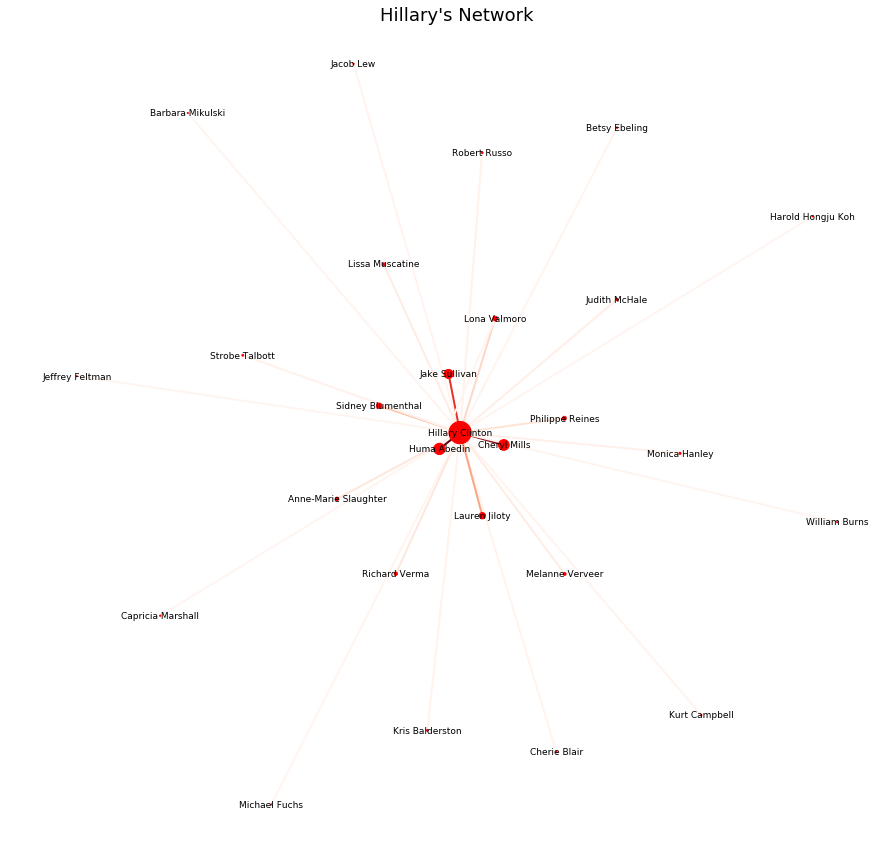

In [312]:
plt.figure(figsize=(15,15))

# Convert matrix to graph
G = nx.from_numpy_matrix(np.matrix(weighted_matrix))

# Graph laout
pos = nx.spring_layout(G)

# Retrieve values to names
labels={}
for n in G.nodes:
    for k, v in map_id.items():
        if v == n:
            value = persons[persons.Id == k].Name.values[0]
            labels[n]=value
# Calculate node sizes            
node_sizes = weighted_matrix.sum(axis=0)/weighted_matrix.sum(axis=0).sum()*1000

# Calculate edge opacity (weights)
edges_tuple = list(zip(pre_adjacency['to'], pre_adjacency['from']))
weights = pre_adjacency.weights.tolist()

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='red')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, edgelist=edges_tuple, edge_color=weights,
                               edge_cmap=plt.cm.Reds, width=2, alpha=1)
nx.draw_networkx_labels(G,pos,labels,font_size=9)

ax = plt.gca()
ax.set_axis_off()
plt.title('Hillary\'s Network', size=18)
plt.show()

## Remarks and Interpretations

- To ease the readability we have decided to keep only the most connected persons with Hillary

- Node size refers to the total amount of emails exchanges through all exchange

- Edge colors depends on the number of exchanges between the two nodes

We can easily understand that the main exchangers are Huma Abein, Chery Mills, Jake Sullivan, Lauren Jiloty, Sidney Blumenthal, among others. It is also interesting to see that some edges exist between two nodes apart from Hillary. this is likely due to the difficulty of data cleaning.